In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
df

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083
...,...,...,...
308,Sep-2016,45528702,44534797
309,Oct-2016,44770113,45061618
310,Nov-2016,46285062,45141762
311,Dec-2016,50016137,44943929


In [2]:
df.shape

(313, 3)

             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083


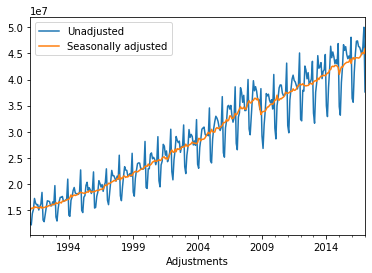

In [3]:
from pandas.tseries.offsets import MonthEnd 
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1) 
df = df.set_index('Adjustments')
print(df.head()) 
df.plot()

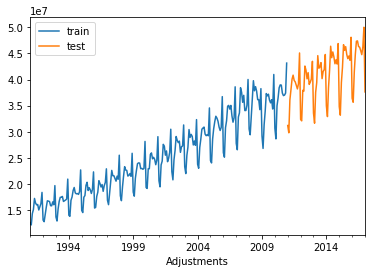

In [4]:
split_date = pd.Timestamp('01-01-2011')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]
# Feature는 Unadjusted 한 개

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526],
       [0.13173822],
       [0.20091289],
       [0.03002688],
       [0.01999285],
       [0.06596369],
       [0.10983126],
       [0.14912986],
       [0.14718865],
       [0.14464787],
       [0.11898427],
       [0.11802682],
       [0.14222108],
       [0.12459168],
       [0.24290801],
       [0.04899091],
       [0.02408276],
       [0.09865054],
       [0.14480155],
       [0.17061844],
       [0.17067229],
       [0.17603636],
       [0.1449117 ],
       [0.14957943],
       [0.15381982],
       [0.16036484],
       [0.28308682],
       [0.05971347],
       [0.05306762],
       [0.15199345],
       [0.17230214],
       [0.21246911],
       [0.23131079],
       [0.1982186 ],
       [0.19187716],
       [0.19381714],
       [0.18857277],
       [0.20528237],
       [0.339

In [6]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [29]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

# train_sc_df.bhead(13)
test_sc_df.head(17)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
2011-01-31,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,0.893021,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-31,0.883631,0.893021,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN
2011-09-30,0.862208,0.883631,0.893021,0.925520,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN


In [30]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [31]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
# print(X_train.shape)
# print(X_train)
# print(y_train.shape)
# print(y_train)

In [32]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print('##################################')
# print(X_train_t)
print('##################################')
# print(y_train)
print(y_train.shape)

최종 DATA
(228, 12, 1)
##################################
##################################
(228, 1)


In [11]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()



Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [15]:
early_stop = EarlyStopping(monitor='loss', patience=7, verbose=1) ## patience 변경

model.fit(X_train_t, y_train,epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 0s 200us/step - loss: 0.0127
Epoch 2/100
228/228 [==============================] - 0s 202us/step - loss: 0.0110
Epoch 3/100
228/228 [==============================] - 0s 196us/step - loss: 0.0106
Epoch 4/100
228/228 [==============================] - 0s 194us/step - loss: 0.0096
Epoch 5/100
228/228 [==============================] - 0s 189us/step - loss: 0.0090
Epoch 6/100
228/228 [==============================] - 0s 200us/step - loss: 0.0086
Epoch 7/100
228/228 [==============================] - 0s 189us/step - loss: 0.0082
Epoch 8/100
228/228 [==============================] - 0s 196us/step - loss: 0.0079
Epoch 9/100
228/228 [==============================] - 0s 196us/step - loss: 0.0076
Epoch 10/100
228/228 [==============================] - 0s 198us/step - loss: 0.0074
Epoch 11/100
228/228 [==============================] - 0s 189us/step - loss: 0.0073
Epoch 12/100
228/228 [==============================] - 0s 198us/step - lo

In [16]:
y_pred = model.predict(X_test_t)
print(y_pred)

[[0.7491817 ]
 [0.7714398 ]
 [0.8586355 ]
 [0.8907484 ]
 [0.9134916 ]
 [0.91702384]
 [0.90231526]
 [0.8954336 ]
 [0.8878076 ]
 [0.88473   ]
 [0.89816177]
 [0.91698587]
 [0.78738505]
 [0.8170568 ]
 [0.8928233 ]
 [0.9080458 ]
 [0.9564915 ]
 [0.9400073 ]
 [0.9210268 ]
 [0.92626274]
 [0.9028293 ]
 [0.9083508 ]
 [0.9122477 ]
 [0.91364884]
 [0.81209916]
 [0.8275583 ]
 [0.91443443]
 [0.95355797]
 [1.0036693 ]
 [0.97548926]
 [0.97685915]
 [0.9761044 ]
 [0.9457283 ]
 [0.9613804 ]
 [0.9604682 ]
 [0.9568684 ]
 [0.8551135 ]
 [0.8686187 ]
 [0.9567475 ]
 [1.0117494 ]
 [1.0556518 ]
 [1.0300218 ]
 [1.0356001 ]
 [1.0182022 ]
 [1.0018691 ]
 [1.0039563 ]
 [0.9891847 ]
 [0.98878026]
 [0.8629609 ]
 [0.8842543 ]
 [0.9803335 ]
 [1.0310508 ]
 [1.0778221 ]
 [1.0633588 ]
 [1.0634297 ]
 [1.0414418 ]
 [1.032044  ]
 [1.033552  ]
 [1.0223676 ]
 [1.0318673 ]
 [0.9112792 ]]


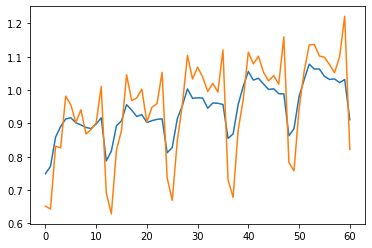

In [17]:
plt.figure()
plt.plot(y_pred)
plt.plot(y_test)